<h3>Now, we train the model on the training data set and test on the test data set</h3>

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics, ensemble
import pickle

The first step is to load the training data set in and downsample for balanced data.

In [6]:
dfA_Train = pd.read_csv('dfA_Train.csv')
dfS_Train = pd.read_csv('dfS_Train_tfidf.csv')
dfS_Train_pca = pd.read_csv('dfS_Train_pca10.csv')


In [7]:
dfS_Train

Unnamed: 0  level_0  alength  index        postid  \
0                0        0       52    0.0  1015a0f4961d   
1                1        1       52    0.0  1015a0f4961d   
2                2        2       52    0.0  1015a0f4961d   
3                3        3       52    0.0  1015a0f4961d   
4                4        4       52    0.0  1015a0f4961d   
5                5        5       52    0.0  1015a0f4961d   
6                6        6       52    0.0  1015a0f4961d   
7                7        7       52    0.0  1015a0f4961d   
8                8        8       52    0.0  1015a0f4961d   
9                9        9       52    0.0  1015a0f4961d   
10              10       10       52    0.0  1015a0f4961d   
11              11       11       52    0.0  1015a0f4961d   
12              12       12       52    0.0  1015a0f4961d   
13              13       13       52    0.0  1015a0f4961d   
14              14       14       52    0.0  1015a0f4961d   
15              15       15       52    0.0  1015a0f4961d   
16              16       16       52    0.0  1015a0f4961d   
17              17       17       52    0.0  1015a0f4961d   
18              18       18       52    0.0  1015a0f4961d   
19              19       19       52    0.0  1015a0f4961d   
20              20       20       52    0.0  1015a0f4961d   
21              21       21       52    0.0  1015a0f4961d   
22              22       22       52    0.0  1015a0f4961d   
23              23       23       52    0.0  1015a0f4961d   
24              24       24       52    0.0  1015a0f4961d   
25              25       25       52    0.0  1015a0f4961d   
26              26       26       52    0.0  1015a0f4961d   
27              27       27       52    0.0  1015a0f4961d   
28              28       28       52    0.0  1015a0f4961d   
29              29       29       52    0.0  1015a0f4961d   
...            ...      ...      ...    ...           ...   
258099      258099   434711      108    0.0  ffe3adf485d8   
258100      258100   434712      108    0.0  ffe3adf485d8   
258101      258101   434713      108    0.0  ffe3adf485d8   
258102      258102   434714      108    0.0  ffe3adf485d8   
258103      258103   434715       26    0.0   fff5d668969   
258104      258104   434716       26    0.0   fff5d668969   
258105      258105   434717       26    0.0   fff5d668969   
258106      258106   434718       26    0.0   fff5d668969   
258107      258107   434719       26    0.0   fff5d668969   
258108      258108   434720       26    0.0   fff5d668969   
258109      258109   434721       26    0.0   fff5d668969   
258110      258110   434722       26    0.0   fff5d668969   
258111      258111   434723       26    0.0   fff5d668969   
258112      258112   434724       26    0.0   fff5d668969   
258113      258113   434725       26    0.0   fff5d668969   
258114      258114   434726       26    0.0   fff5d668969   
258115      258115   434727       26    0.0   fff5d668969   
258116      258116   434728       26    0.0   fff5d668969   
258117      258117   434729       26    0.0   fff5d668969   
258118      258118   434730       26    0.0   fff5d668969   
258119      258119   434731       26    0.0   fff5d668969   
258120      258120   434732       26    0.0   fff5d668969   
258121      258121   434733       26    0.0   fff5d668969   
258122      258122   434734       26    0.0   fff5d668969   
258123      258123   434735       26    0.0   fff5d668969   
258124      258124   434736       26    0.0   fff5d668969   
258125      258125   434737       26    0.0   fff5d668969   
258126      258126   434738       26    0.0   fff5d668969   
258127      258127   434739       26    0.0   fff5d668969   
258128      258128   434740       26    0.0   fff5d668969   

                                                 sentence  slabel  sposition  \
0                                       {hola,desde,cuba}   False          0   
1       {today,air,force,one,touched,havana,first,time...    True

CHoose features to train on...

In [25]:
stSf = pd.concat([ dfS_Train[['slabel','alength','sposition','swcount','polarity','subjectivity']],
                   dfS_Train_pca[['PC1','PC2','PC3','PC4','PC5']] ],axis=1)
dfS_True = stSf[stSf.slabel==True]
dfS_False = stSf[stSf.slabel==False]
index_file = 'false_indices_train.pkl'


In [26]:
number_true = dfS_True.shape[0]

# re-regenerate or load false_indices
#false_indices = np.random.choice(dfS_False.shape[0], number_true, replace=False)
#print(len(false_indices))

# select samples
dfS_False_dsamp = dfS_False.iloc[false_indices]


3440


In [34]:
with open(index_file,'wb') as f:
    pickle.dump(false_indices,f)

In [27]:
dfS_False_dsamp.shape

(3440, 11)

In [28]:
dfS_True.shape

(3440, 11)

In [29]:
dfTrain_balanced = pd.concat([dfS_True,dfS_False_dsamp],axis=0)
dfTrain_balanced.head()

slabel  alength  sposition  swcount  polarity  subjectivity       PC1  \
1      True       52          1        9  0.047222      0.311111  0.186638   
184    True       87         65        4  0.500000      0.150000  0.051036   
185    True       87         66       14  0.358333      0.491667  0.052127   
186    True       87         67       14  0.700000      0.600000  0.020815   
229    True       70         23        7  0.100000      0.550000 -0.027386   

          PC2       PC3       PC4       PC5  
1   -0.007129 -0.179377  0.178980 -0.268520  
184  0.014585  0.006900  0.010595  0.002239  
185 -0.017170  0.006321  0.023309  0.017984  
186  0.004736 -0.023999  0.028551  0.022655  
229  0.040915  0.002029 -0.007199  0.005509

In [48]:
Ytrain = dfTrain_balanced['slabel'].astype('int')
Xtrain = dfTrain_balanced[dfTrain_balanced.columns[1:6]]
rfm = ensemble.RandomForestClassifier(n_estimators=500, class_weight=None)
rfm.fit(Xtrain,Ytrain)
print(rfm.score(Xtrain,Ytrain))


0.998255813953


Now get test features...

In [31]:
dfS_Test = pd.read_csv('dfS_Test.csv')

In [35]:
stTf = dfS_Test[['slabel','alength','sposition','swcount','polarity','subjectivity']]
dfT_True = stTf[stTf.slabel==True]
dfT_False = stTf[stTf.slabel==False]
index_file_T = 'false_indices_test.pkl'


Downsample

In [40]:

number_true_test = dfT_True.shape[0]

# re-regenerate or load false_indices
#false_indices_T = np.random.choice(dfT_False.shape[0], number_true_test, replace=False)
#print(len(false_indices_T))

# select samples
dfT_False_dsamp = dfT_False.iloc[false_indices_T]

1253


In [42]:
with open(index_file_T,'wb') as f:
    pickle.dump(false_indices_T,f)

In [43]:
dfTest_balanced = pd.concat([dfT_True,dfT_False_dsamp],axis=0)
dfTest_balanced.head()

slabel  alength  sposition  swcount  polarity  subjectivity
38     True       92         37        8      0.00          0.00
107    True      183         13       22      0.00          0.00
108    True      183         14        3      0.60          0.90
288    True       59         12       18      0.00          0.25
392    True       87         10       13      0.05          0.20

In [49]:
Ytest = dfTest_balanced['slabel'].astype('int')
Xtest = dfTest_balanced[dfTest_balanced.columns[1:]]
print(rfm.score(Xtest,Ytest))

0.58419792498


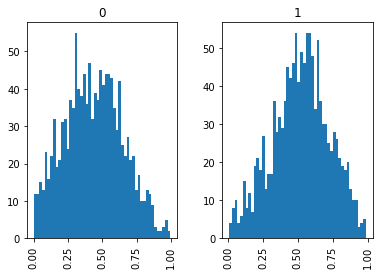

In [51]:
from matplotlib import pyplot as plt
test_predix3 = rfm.predict_proba(Xtest)[:,1]
test_predix3 = pd.DataFrame(test_predix3,Ytest,columns=['pred'])

plt.figure();
test_predix3.hist(by=test_predix3.index,bins=50)
plt.show()

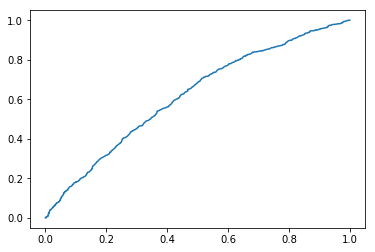

In [53]:
fpr, tpr, thresh = metrics.roc_curve(Ytest, test_predix3)

plt.figure();
plt.plot(fpr,tpr)
plt.show()

<h3>Try a gradient boosted classifier</h3>

In [68]:
gbm = ensemble.GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, max_depth=3)
gbm.fit(Xtrain,Ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [69]:
gbm.score(Xtest,Ytest)

0.62011173184357538

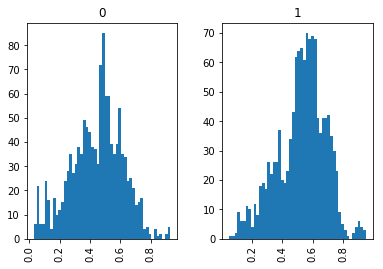

In [70]:
test_predix4 = gbm.predict_proba(Xtest)[:,1]
test_predix4 = pd.DataFrame(test_predix4,Ytest,columns=['pred'])

plt.figure();
test_predix4.hist(by=test_predix4.index,bins=50)
plt.show()

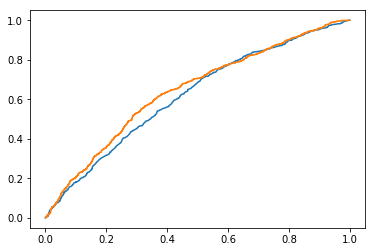

In [71]:
fpr1, tpr1, thresh = metrics.roc_curve(Ytest, test_predix4)

plt.figure();
plt.plot(fpr,tpr,fpr1,tpr1)
plt.show()

In [74]:
test_predix4.shape

(2506, 1)

In [85]:
dfTest_balanced.shape

(2506, 6)

In [116]:
df1 = dfTest_balanced.reset_index()
print(['old_ix']+ list(df1.columns[1:]))
df1.columns = [['old_ix']+ list(df1.columns[1:])]
df2 = test_predix4.reset_index()
dfPred = pd.merge(df1,df2,left_index=True,right_index=True)

['old_ix', 'slabel', 'alength', 'sposition', 'swcount', 'polarity', 'subjectivity']


In [120]:
print(dfPred.sort_values('pred',ascending=0).iloc[0:2].old_ix)

dfS_Test.iloc[dfPred.sort_values('pred',ascending=0).iloc[0:2].old_ix]

32    2569
33    2570
Name: old_ix, dtype: int64


level_0  alength  index        postid  \
2569    10855       10    0.0  17561386b14b   
2570    10856       10    0.0  17561386b14b   

                                 sentence  slabel  sposition  swcount  \
2569  {taken,great,photos,time,world,see}    True          5        6   
2570        {share,favorite,photos,today}    True          6        4   

      polarity  subjectivity  
2569      0.25        0.3125  
2570      0.00        0.5000

In [122]:
dfA_Train.head()

postid                                              title  \
0  f3f2004edc1b  Por que vou perder meu emprego em uma agência ...   
1  37ff6476a8ba                 The Secret History of Dion Waiters   
2  f7d3ab463717  Let’s Rebuild our Infrastructure, Not Provide ...   
3  1f15e387e536  So You Want to be a Functional Programmer (Par...   
4  5266e85b6cd0                              How to Define Success   

      popdate                                                url  \
0  2016-01-27  https://medium.com/@hicaioandrade/por-que-vou-...   
1  2017-02-08  https://theringer.com/dion-waiters-miami-heat-...   
2  2016-11-22  https://medium.com/senator-bernie-sanders/lets...   
3  2016-09-04  https://medium.com/@cscalfani/so-you-want-to-b...   
4  2017-06-28  https://medium.com/the-year-of-the-looking-gla...   

         userid          username  \
0  30965eb12647              Caio   
1  455fb3fb81d4      Shea Serrano   
2  e6eea336dd74    Bernie Sanders   
3  85310ec460ee  Charles Scalfani   
4  b8a4e5ae7490        Julie Zhuo   

                                           highlight nlikes ncomments  ntags  \
0  Se antes a publicidade existia para resolver u...    802        44    2.0   
1  There was the Cleveland deity, LeBronicus, the...    342        31    5.0   
2  Unlike Trump’s plan, which creates new tax loo...    631        36    5.0   
3  There are no variables in Functional Programming.   6.7K        97    5.0   
4  The greatest skill you can develop to achieve ...    511        13    5.0   

   origdb                                               tags  \
0     3.0                                     Brasil,Digital   
1     3.0    NBA,Sports,Dion Waiters,Miami Heat,LeBron James   
2     3.0  Politics,2016 Election,Infrastructure,Donald T...   
3     3.0  Functional Programming,Technology,JavaScript,T...   
4     3.0  Entrepreneurship,Success,Design,Careers,Happiness   

                                                text  npar  
0  Hoje acordei, peguei o celular e com um olho a...  18.0  
1  The Expert: Older; early 70s. Successful. Inte...  41.0  
2  Our infrastructure is collapsing, and the Amer...   6.0  
3  Taking that first step to understanding Functi...  85.0  
4  This was first published on my mailing list Th...  35.0